# Explore the LS DR10 cross-matches for potential SN IIP

Author: Melissa Graham, Midori Rollins

## Set up and read files

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

Read in the nightly epoch light curves for all candidates.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

Read in the parameters for the nightly epoch light curves for all candidates.

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

Read in the list of candidate IDs for potential SNIIP that Melissa made with the MLG_snia_menagerie.ipynb notebook.

In [6]:
potsniip_candid = np.loadtxt('potential_sniip_list.dat', dtype='str', usecols=(0))

Read in all rows of the cross-matched file.

`flagstar` : 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 

`flagcore` : 1 if matched to the core of the galaxy; 0 otherwise (int) 

`flagmatch` : 1 if a star AND galaxy met constraints; 0 if one or the other; -1 if unmatched (int) 


In [7]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

For every potential sniip store its index in the `paramLC_` arrays 
as `mindex` for the `lsdr10xm_` arrays.

In [9]:
lsdr10xm_mindex = np.zeros(len(lsdr10xm_candid), dtype='int')-1

if potsniip_candid.size > 1:
    for cid in potsniip_candid:
        tx = np.where(lsdr10xm_candid == cid)[0]
        if len(tx) == 1:
            ttx = np.where(paramLC_candid == cid)[0]
            if len(ttx) == 1:
                lsdr10xm_mindex[tx[0]] = ttx[0]
            del ttx
        del tx
if potsniip_candid.size == 1:
    tx = np.where(lsdr10xm_candid == potsniip_candid)[0]
    if len(tx) == 1:
        ttx = np.where(paramLC_candid == potsniip_candid)[0]
        if len(ttx) == 1:
            lsdr10xm_mindex[tx[0]] = ttx[0]
        del ttx
    del tx

Check that all the potential SNIa were successfully matched.

In [10]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx), ' should equal ', potsniip_candid.size)

5  should equal  5


## Number of potential SNIa with matches

Recall that the `flagstar` column is 1 if the nearest cross-match is a star
and 0 if it is a galaxy.

Recall that the `flagmatch` column is 1 if there was a nearby object of a different
type within the search radius, indicating potential confusion in object or host type.

Identify potential SNIa with no matches, star matches, and galaxy matches.

In [11]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx))

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of potential SNIIP that are cross-matched with:')
print('no source: ', len(ax))
print('a galaxy: ', len(bx))
print('a star: ', len(cx))

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of potential SNIIP that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

5
 
Number of potential SNIIP that are cross-matched with:
no source:  0
a galaxy:  2
a star:  3
 
Number of potential SNIIP that are cross-matched with:
a galaxy, but a star is nearby too:  1
['DC23kgxwc']
a star, but a galaxy is nearby too:  2
['DC23jmszp' 'DC23kgbgx']


## Histograms

Plot some histograms to compare the cross-matched stars and galaxies.

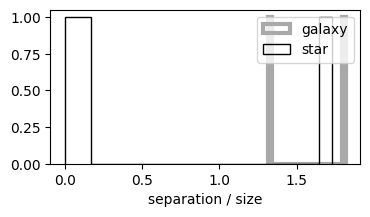

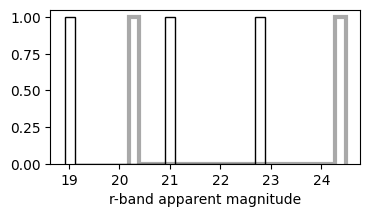

In [13]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_sep[tx[bx]]/lsdr10xm_shaper[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_sep[tx[cx]]/lsdr10xm_rpsfsize[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('separation / size')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_rmag[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_rmag[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('r-band apparent magnitude')
plt.show()

del tx, bx, cx

## Light curves

Plot the lightcurves of 3 potential SNIIP that are cross-matched to stars

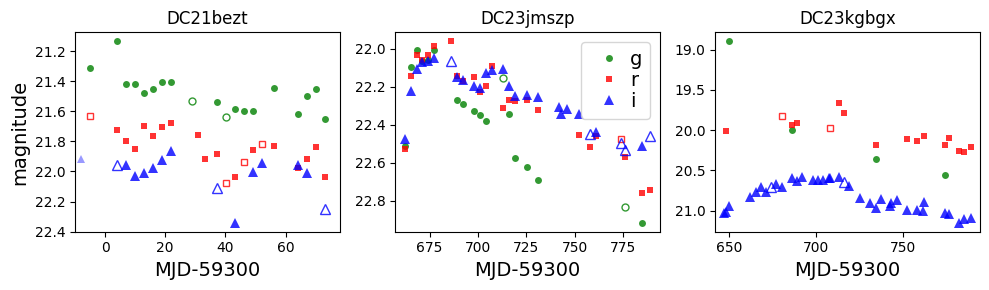

In [33]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
ttx = np.where(lsdr10xm_flagstar[tx] == 1)[0]
sx = lsdr10xm_mindex[tx[ttx]]
del tx, ttx

fig, ax = plt.subplots( 1, 3, figsize=(10, 3), sharex=False, sharey=False )

s = 0
for i in range(1):
    ax[0].set_ylabel('magnitude', fontsize=14)
    for j in range(3):
        if s <= 17:
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                ax[j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                del cx0, cx1, cx2

            cx = np.where((candLC_candid == paramLC_candid[sx[s]]) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx])
            xmax = np.max(candLC_mjd[cx])
            del cx
            ax[j].invert_yaxis()
            ax[j].set_xlim([xmin-59300.-5, xmax-59300.+5])
            del xmin, xmax
            ax[j].set_title(paramLC_candid[sx[s]])
            s += 1

ax[1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(3):
    ax[j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

This one looks transient-like:

In [35]:
templist = ['DC23jmszp']

In [36]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'

link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))

print('%10s  %8s  %9s  %5s  %8s  %5s' % ('candid','flagstar','flagmatch','sep','rpsfsize','mag'))

for temp in templist:
    tx = np.where(link_candid == temp)[0]
    jx = np.where(lsdr10xm_candid == temp)[0]
    print('%10s  %8i  %9i  %5.2f  %8.6f  %5.2f' % 
          (temp, lsdr10xm_flagstar[jx[0]], lsdr10xm_flagmatch[jx[0]], 
          lsdr10xm_sep[jx[0]], lsdr10xm_rpsfsize[jx[0]], lsdr10xm_rmag[jx[0]]))
    print(link_lsview[tx[0]])
    print(link_rkview[tx[0]])
    del tx

del fnm

    candid  flagstar  flagmatch    sep  rpsfsize    mag
 DC23jmszp         1          1   0.00  1.249492  22.88
https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.99760402174&dec=2.02701910723299&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC23jmszp


After reviewing the match, DC23jmszp looks to be matched to a star.

However notice that the match flag was 1, so the star was faint. Likely a mis-match, we keep in mind.